# Run and Plot FluSight Forecasts (2024-2025 season)<a class="anchor" id="top"></a>

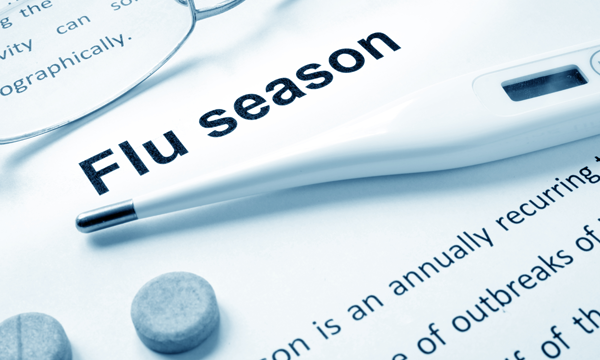

## Table of contents: Experimental

* [Run forecast](#run-forecast)
* [Import forecast files](#import-forecast)
* [Plot fore quantiles](#plot-fore-quantiles)

In [4]:
import importlib
import os
from pathlib import Path
import sys
import time

os.chdir("..")  # Move to root.

import IPython.display
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib as mpl
# from matplotlib import ticker
# from matplotlib import dates
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd

# MANUALLY ADD RTREND LIBRARY PATH
sys.path.append("/Users/pventura/NonCloudStorage/Rtrend_project/")

from rtrend_forecast.reporting import get_rtrend_logger, SUCCESS
import rtrend_forecast.visualization as vis
import rtrend_interface.flusight_tools as fst
import rtrend_interface.truth_data_structs as tds

# ------

_LOGGER = get_rtrend_logger().getChild("jupyter")
# ---
# %matplotlib notebook
%matplotlib widget
mpl.rcParams["pdf.fonttype"] = 42

main_rc = mpl.rcParams.copy()

main_rc["patch.linewidth"] = 0.
aggr_ref_tlabel = pd.Timestamp("2023-10-08")  # Sunday 00am, turns epiweek


# Run forecast <a class="anchor" id="run-forecast"></a>

[Back to top](#top)

In [9]:
do_run = True
do_export = True
# now_str = pd.Timestamp.now().isoformat()
now_str = (pd.Timestamp.now() - pd.Timedelta("1d")).isoformat()
now_str = "2024-04-22"  # Date of the last forecast done
print(f"Now str = {now_str}")

if do_run:
    xt0 = time.time()
    cmd = f"source activate rtrend_dev && python flusight_forecast.py --now {now_str}"
    cmd += "" if do_export else " --no-export"
    os.system(cmd)
    xtf = time.time()
    print("----------")
    print(f"Total script execution time = {xtf - xt0:0.2f}s")
else:
    print("Skipped")

Now str = 2024-04-22
[Arkansas_2024-04-20] Level 15: Forecast concluded
[Alabama_2024-04-20] Level 15: Forecast concluded
[Connecticut_2024-04-20] Level 15: Forecast concluded
[Florida_2024-04-20] Level 15: Forecast concluded
[Idaho_2024-04-20] Level 15: Forecast concluded
[Alaska_2024-04-20] INFO: Added 0.9 to the daily incidence so to have cases to feed the renewal equation.
[Alaska_2024-04-20] INFO: Changed method to `rnd_normal`.
[Delaware_2024-04-20] Level 15: Forecast concluded
[California_2024-04-20] Level 15: Forecast concluded
[Georgia_2024-04-20] Level 15: Forecast concluded
[Illinois_2024-04-20] Level 15: Forecast concluded
[District-of-Columbia_2024-04-20] Level 15: Forecast concluded
[Hawaii_2024-04-20] Level 15: Forecast concluded
[Colorado_2024-04-20] Level 15: Forecast concluded
[Alaska_2024-04-20] Level 15: Forecast concluded
[Indiana_2024-04-20] Level 15: Forecast concluded
[Iowa_2024-04-20] Level 15: Forecast concluded
[Arizona_2024-04-20] Level 15: Forecast conclude

# Import forecast files <a class="anchor" id="import-forecast"></a>

In [10]:
# -------------------------------
# PARAMETERS
# -------------------------------
# input_file = Path("inputs/flusight_params.yaml")
truth_data_file = Path("hosp_data/truth_weekly_latest.csv")

# # --- Select output 
output_dir = Path("outputs/latest/")
flusight_output_file = Path("forecast_out/latest.csv")
now = pd.Timestamp(now_str)

# # # # # # # # # # # Past !! 
# # output_dir = Path("outputs/flusight_2024-04-20/")
# output_dir = Path("outputs/flusight_2023-12-09/")
# truth_data_file = Path("hosp_data/past_BKP/truth_daily_latest_2023-12-19.csv")


# -------------------------------
# IMPORTS
# -------------------------------
importlib.reload(fst)


obj = fst.FluSightGeneralOutputs(output_dir)
# truth = tds.FluDailyTruthData(truth_data_file)
truth = tds.FluWeeklyTruthData(truth_data_file)
dates = fst.FluSightDates(now)

fsobj = fst.FluSight2023Fore(flusight_output_file)
    
obj.q_df

2024-04-21  2024-04-28  2024-05-05  2024-05-12  \
location_name quantile                                                   
Alabama       0.010           0.00       1.000       0.000       0.000   
              0.025           0.00       2.000       0.000       0.000   
              0.050           0.00       4.000       0.000       0.000   
              0.100           0.00       5.000       0.000       0.000   
              0.150           1.00       7.000       1.000       0.000   
...                            ...         ...         ...         ...   
US            0.850         708.00    4343.300    4003.150    3600.300   
              0.900         741.00    4583.000    4405.000    4096.200   
              0.950         810.05    4952.050    5016.300    4911.150   
              0.975         865.00    5283.125    5596.675    5674.125   
              0.990         931.00    5675.090    6308.090    6631.140   

                        2024-05-19  2024-05-26  2024-06-02  
location_name quantile                                      
Alabama       0.010          0.000       0.000        0.00  
              0.025          0.000       0.000        0.00  
              0.050          0.000       0.000        0.00  
              0.100          0.000       0.000        0.00  
              0.150          0.000       0.000        0.00  
...                            ...         ...         ...  
US            0.850       3225.150    2890.450     2262.15  
              0.900       3799.600    3529.200     2853.10  
              0.950       4751.500    4620.450     3900.30  
              0.975       5691.175    5706.775     4933.50  
              0.990       6858.160    7093.250     6291.47  

[1219 rows x 7 columns]

# Quantile forecats <a class="anchor" id="plot-fore-quantiles"></a>

[jupyter] INFO: Plotting...


/Users/pventura/NonCloudStorage/Flu_forecast/programs/tmp_figs/ct_states.pdf

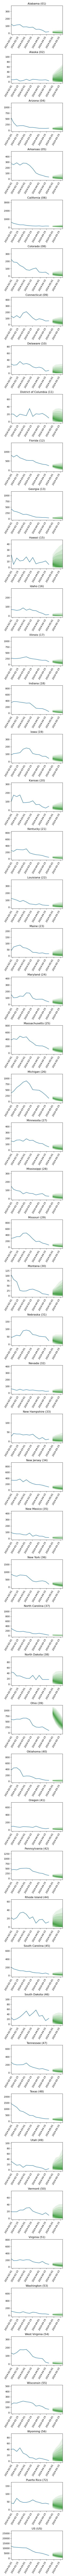

In [11]:
rc = main_rc.copy()
importlib.reload(vis)

do_save_plots = True
do_open_plots = True
dt_behind = pd.Timedelta("12w")
# dt_behind = pd.Timedelta("59w")

with plt.rc_context(rc):
    use_states = obj.q_df.index.get_level_values("location_name").unique()
    num_states = len(use_states)
#     fig, axes = vis.make_axes_seq(num_states)
    with plt.ioff():
#         fig, axes = vis.make_axes_seq(num_states, max_cols=1, total_width=8.)  # Wider panels
        fig, axes = vis.make_axes_seq(num_states, max_cols=1, total_width=4.)  # Wider panels
    
    _LOGGER.info("Plotting...")
    for i_ax, state_name in enumerate(use_states):
        ax = axes[i_ax]
        
#         truth_sr = truth.xs_state_weekly(state_name, aggr_ref_tlabel).loc[dates.now - dt_behind:]
        truth_sr = truth.xs_state(state_name)
        
        # -()- From full dataset
        q_df = obj.q_df.xs(state_name).copy()
        plot_df = q_df.iloc[:, 1:]  # EXCLUDES FIRST WEEK (incomplete)
        
                
        # Plot commands
        # -------------
        # --- Truth series
        ax.plot(truth_sr)
    
        # --- Quantile forecats
        previous_week = plot_df.columns[0] - pd.Timedelta("1w")
        
        vis.plot_fore_quantiles_as_area(
            ax, plot_df,  
#             prepend_point=(previous_week, truth_sr[previous_week])
        )

        # Extra
        ax.set_title(f"{state_name} ({truth.state_name_to_id[state_name]})" )
        ax.xaxis.set_major_locator(mpl.dates.AutoDateLocator())

        ax.set_xlim(dates.now - dt_behind, dates.now + pd.Timedelta("4w"))
        vis.rotate_ax_labels(ax)
    
    fig.tight_layout()
    
    if do_save_plots:
        os.makedirs("tmp_figs/", exist_ok=True)
        fig.savefig(f"tmp_figs/ct_states.pdf")
        flink = IPython.display.FileLink("tmp_figs/ct_states.pdf")
        display(flink)
        if do_open_plots:
            os.system("open tmp_figs/ct_states.pdf")
        
    display(fig.canvas)



[Back to run](#run-forecast)

# Reproduction number

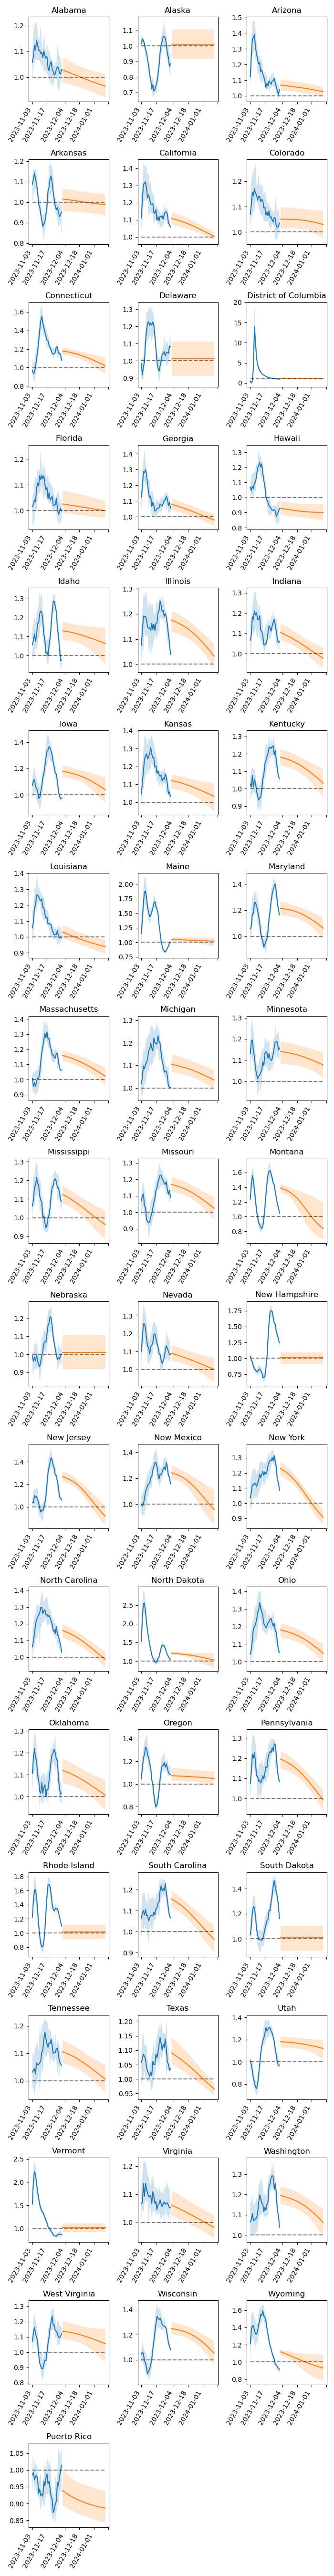

In [10]:

# ---------
rc = main_rc.copy()

do_save_plots = False

with plt.rc_context(rc):
    
#     # ----TEST
#     state_name = "California"
    use_states = obj.rt_past_df.index.get_level_values("location_name").unique()
    num_states = len(use_states)
    fig, axes = vis.make_axes_seq(num_states, total_width=7.)
    
    for i_ax, state_name in enumerate(use_states):
        ax = axes[i_ax]

        rt_past = obj.rt_past_df.xs(state_name, level="location_name").iloc[1:]
        rt_fore = obj.rt_fore_df.xs(state_name, level="location_name")

        # R(t) past
        ax.plot(rt_past["rt_past_median"])
        ax.fill_between(
            rt_past.index,
            rt_past["rt_past_low_q"],
            rt_past["rt_past_high_q"],
            alpha=0.2
        )

        # R(t) fore
        ax.plot(rt_fore["rt_fore_median"])
        ax.fill_between(
            rt_fore.index,
            rt_fore["rt_fore_low_q"],
            rt_fore["rt_fore_high_q"],
            alpha=0.2
        )
        
        # Reference lines
        ax.plot([rt_past.index[0], rt_fore.index[-1]], [1., 1.], "k--", alpha=0.5)

        # Extra
        ax.set_title(state_name)
        ax.xaxis.set_major_locator(mpl.dates.AutoDateLocator())

        vis.rotate_ax_labels(ax)
    
    fig.tight_layout()
    
    if do_save_plots:
        fig.savefig(f"tmp_figs/rt_states.pdf")
    

# Tests - View categorical rate change forecasts



In [8]:
# #-- -- - Load submittable file


fore_df = pd.read_csv(
    "forecast_out/latest.csv", 
#     "forecast_out/APAGAR_latest_pre-horizon-change.csv", 
#     "forecast_out/tests/old_forecast_test.csv", 
    parse_dates=["reference_date", "target_end_date"])

color_map = plt.get_cmap("RdYlGn")
color_i_seq = np.array([1.00, 0.75, 0.50, 0.25, 0.00])

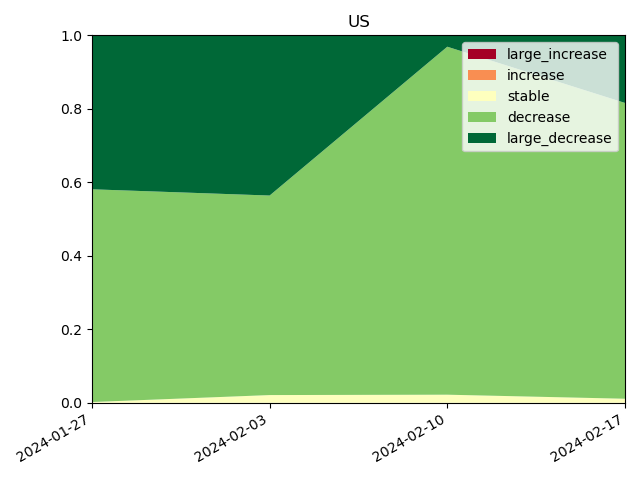

In [9]:
state_name = "US" # "Illinois"

# ----------
# -! NOTE will need to read the population file to convert between state ID and name

# # -()- "Decrease" as base
# rate_change_names = [
#     "large_decrease", "decrease", "stable", "increase", "large_increase"]
# color_i_seq = np.array([1.00, 0.75, 0.50, 0.25, 0.00])

# -()- "Increase" as base (looks better, as moving to "increase" is actually an increasing curve)
rate_change_names = [
    "large_increase", "increase", "stable", "decrease", "large_decrease"]
color_i_seq = np.array([0.0, 0.25, 0.50, 0.75, 1.0])


rate_change_id = {name: i for i, name in enumerate(rate_change_names)}  # Signature: r[i] = name


# ---------------

# -! TODO: also a version that aggregates some levels.

# --- Select data (state, rate change)
df = fore_df.loc[
      (fore_df["location"] == truth.state_name_to_id[state_name])
    & (fore_df["target"] == "wk flu hosp rate change")
    & (fore_df["output_type"] == "pmf")
]


# --- Convert values into a 2D table 
df.set_index(["output_type_id", "target_end_date"], inplace=True)
df.reindex()

value_table = df["value"].unstack("target_end_date").loc[rate_change_names]
#  ^  ^  Signature: df.loc[output_type_id, target_end_date]

# --------------- PLOT

rc = dict()
rc["axes.prop_cycle"] = mpl.cycler(color=color_map(color_i_seq))

with mpl.rc_context(rc):
    fig, ax = plt.subplots()

    ax.stackplot(value_table.columns, value_table, labels=rate_change_names)
    
    # TODO: set locator
    ax.legend()
    ax.set_title(state_name)
    ax.set_xlim(value_table.columns[0], value_table.columns[-1])
    ax.set_ylim(0., 1.0)
    
    ax.xaxis.set_major_locator(mpl.dates.WeekdayLocator(5))
    
    vis.rotate_ax_labels(ax, angle=30)
    fig.tight_layout()

In [10]:
# value_table.sort_index(axis=0, key=lambda s: rate_change_id[s])
value_table.loc[rate_change_names]

target_end_date  2024-01-27  2024-02-03  2024-02-10  2024-02-17
output_type_id                                                 
large_increase        0.000       0.000       0.000       0.000
increase              0.000       0.000       0.000       0.000
stable                0.002       0.021       0.022       0.011
decrease              0.579       0.543       0.947       0.805
large_decrease        0.419       0.436       0.031       0.184

----